# Customer Analysis for Marketing and Sales Teams



The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. This analysis aims to answer the following questions:

1. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?
2. Are there differences in ordering habits based on a customer’s loyalty status?
3. Are there differences in ordering habits based on a customer’s region?
4. Is there a connection between age and family status in terms of ordering habits?
5. What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?
6. What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.



In [1]:
import os
import pandas as pd
from botocore.client import Config
import ibm_boto3
import io
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to load the pickle file from IBM COS
def load_pickle_from_cos(bucket, key, client):
    # Get the object from the bucket
    response = client.get_object(Bucket=bucket, Key=key)
    
    # Read the object content
    object_content = response['Body'].read()
    
    # Load the pickle file into a DataFrame
    df = pd.read_pickle(io.BytesIO(object_content))
    return df

# Initialize the COS client
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='MjJB2foti-ACb0aum6tpr_MABhlskLbgK4djDXeXLltL',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'task410-donotdelete-pr-fck0m7flgp8x29'
object_key = 'task4.9_part1.pkl'

# Load the DataFrame
df = load_pickle_from_cos(bucket, object_key, cos_client)

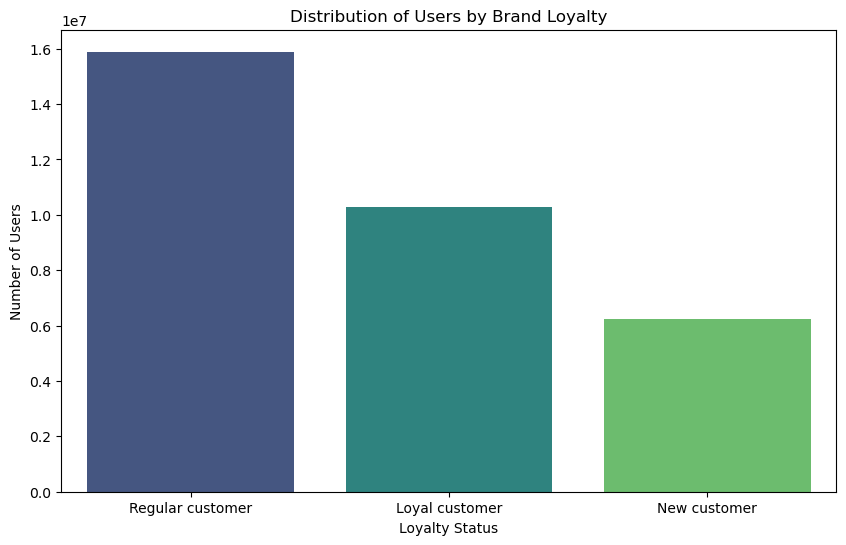

In [2]:
# Count the number of users in each loyalty category
loyalty_distribution = df['loyalty_flag'].value_counts()

# Plot the distribution of loyalty
plt.figure(figsize=(10, 6))
sns.barplot(x=loyalty_distribution.index, y=loyalty_distribution.values, palette='viridis')
plt.title('Distribution of Users by Brand Loyalty')
plt.xlabel('Loyalty Status')
plt.ylabel('Number of Users')
plt.show()

### Question 5.1: What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

The bar plot below shows the distribution of users based on their brand loyalty. It provides insights into how often users return to Instacart, categorized by their loyalty status.

From the plot, it can be observed that:
- The majority of users fall under the 'Regular customer' category, indicating a strong return rate to Instacart.
- A significant number of users are also categorized as 'Loyal customer', meaning they return to Instacart frequently, though not as often as the 'Regular customer' users.
- There is a smaller proportion of users in the 'New customer' category, which includes those who have recently started using Instacart and have not yet shown strong loyalty patterns.

Understanding this distribution helps the marketing and sales teams identify and target different user segments based on their loyalty status


# Question 5.2: Are there differences in ordering habits based on a customer’s loyalty status?

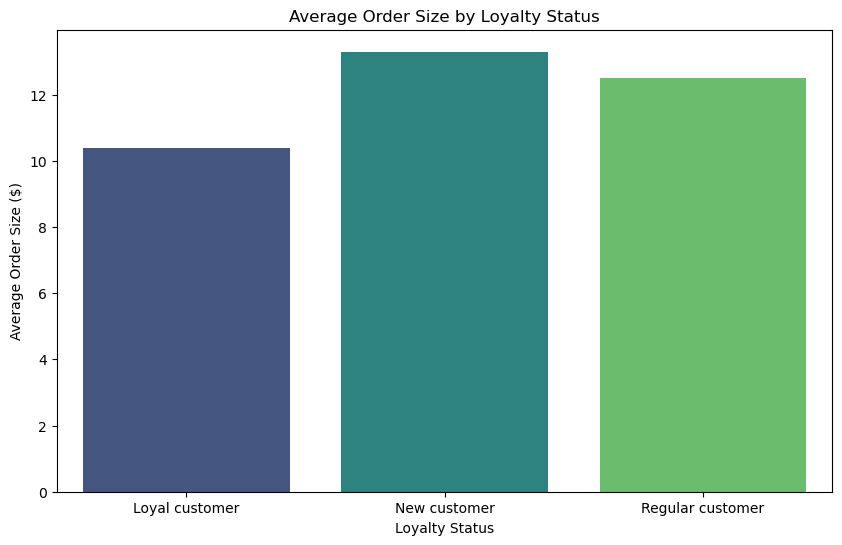

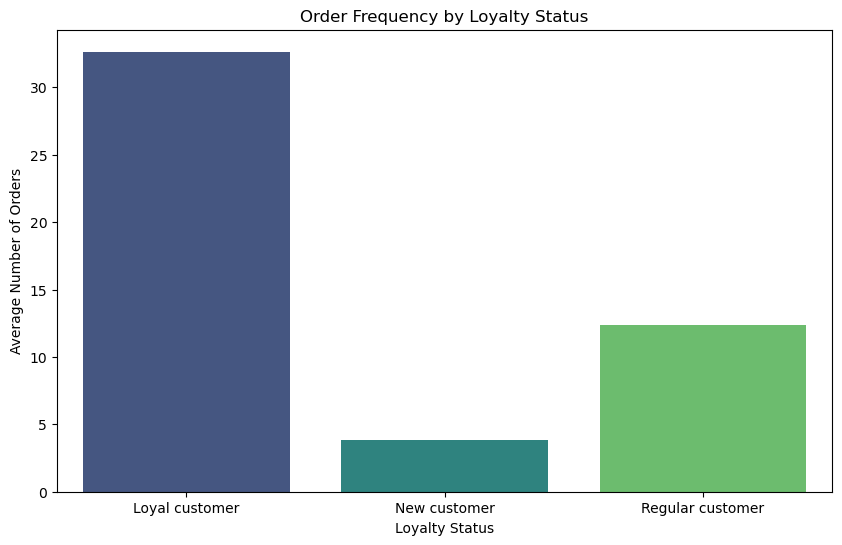

In [3]:
# Calculate average order size by loyalty status
avg_order_size_by_loyalty = df.groupby('loyalty_flag')['prices'].mean().reset_index()

# Calculate order frequency by loyalty status
order_frequency_by_loyalty = df.groupby('loyalty_flag')['order_number'].mean().reset_index()

# Plot average order size
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_order_size_by_loyalty['loyalty_flag'], y=avg_order_size_by_loyalty['prices'], palette='viridis')
plt.title('Average Order Size by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Average Order Size ($)')
plt.show()

# Plot order frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=order_frequency_by_loyalty['loyalty_flag'], y=order_frequency_by_loyalty['order_number'], palette='viridis')
plt.title('Order Frequency by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Average Number of Orders')
plt.show()


### 5.2 Ordering Habits Based on Customer's Loyalty Status

#### Average Order Size by Loyalty Status
The bar plot titled **"Average Order Size by Loyalty Status"** shows the average order size for loyal customers, new customers, and regular customers. The plot reveals that:
- New customers tend to place larger orders on average compared to both regular and loyal customers.
- Regular customers have an average order size slightly higher than loyal customers.



#### Order Frequency by Loyalty Status
The bar plot titled **"Order Frequency by Loyalty Status"** shows the average number of orders placed by loyal customers, new customers, and regular customers. The plot reveals that:
- Loyal customers have the highest order frequency, indicating that they return to Instacart more frequently.
- Regular customers have a moderate order frequency.
- New customers have the lowest order frequency.



These insights can help the marketing and sales teams to develop targeted strategies for different customer segments based on their loyalty status.


# 5.3 Are there differences in ordering habits based on a customer’s region?

In [4]:
# Define a dictionary mapping states to regions
state_to_region = {
    'Northeast': ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Ohio', 'Indiana', 'Illinois', 'Michigan', 'Wisconsin', 'Minnesota', 'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas'],
    'South': ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'],
    'West': ['Idaho', 'Montana', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah', 'Nevada', 'Washington', 'Oregon', 'California', 'Alaska', 'Hawaii']
}

# Create a function to map states to regions
def get_region(state):
    for region, states in state_to_region.items():
        if state in states:
            return region
    return 'Other'

# Apply the function to create a new 'Region' column
df['region'] = df['state'].apply(get_region)

# Convert 'Region' column to category type
df['region'] = df['region'].astype('category')

# Verify the changes
print(df['region'].dtype)
print(df['region'].head())

category
0    South
1    South
2    South
3    South
4    South
Name: region, dtype: category
Categories (4, object): ['Midwest', 'Northeast', 'South', 'West']


In [5]:
# Calculate average order size by region
average_order_size_by_region = df.groupby('region')['prices'].mean().reset_index()

In [6]:
# Calculate order frequency by region
order_frequency_by_region = df.groupby('region')['order_id'].count().reset_index()
order_frequency_by_region.columns = ['region', 'order_count']

In [7]:
# Merge the average order size and order frequency dataframes
region_ordering_habits = average_order_size_by_region.merge(order_frequency_by_region, on='region')

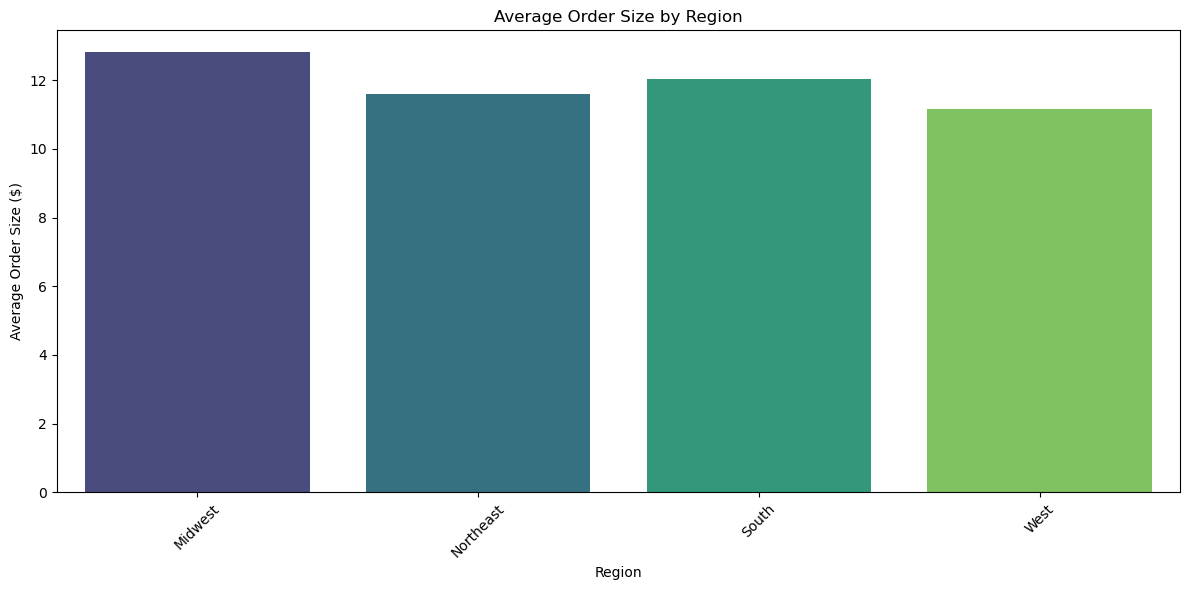

In [8]:
# Plot the average order size by region
plt.figure(figsize=(12, 6))
sns.barplot(data=region_ordering_habits, x='region', y='prices', palette='viridis')
plt.title('Average Order Size by Region')
plt.xlabel('Region')
plt.ylabel('Average Order Size ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

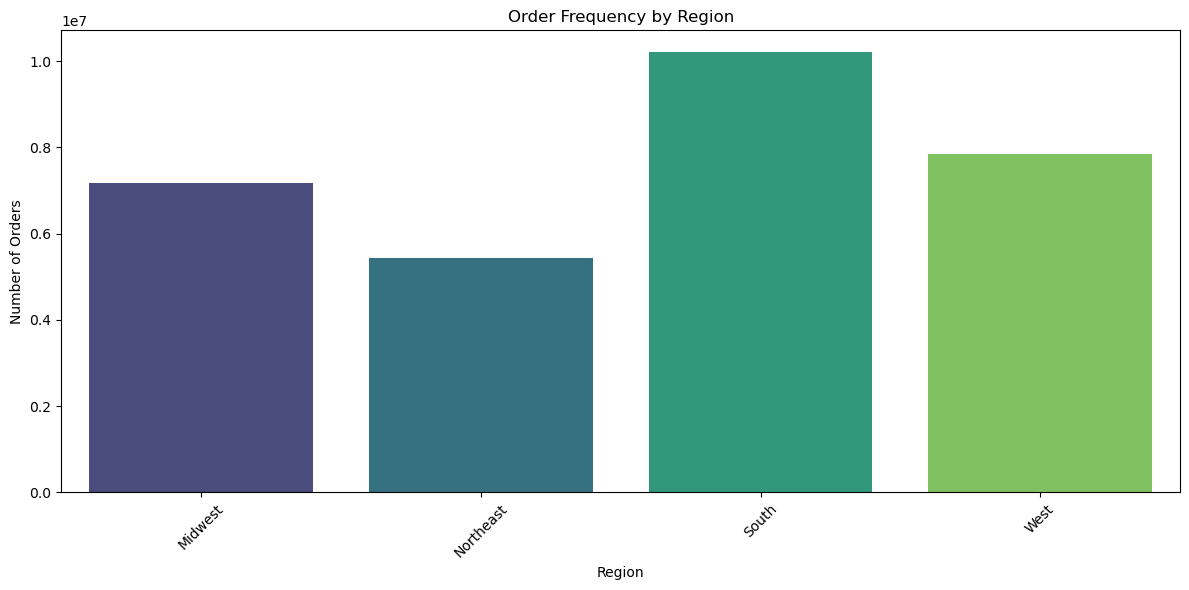

In [9]:
# Plot the order frequency by region
plt.figure(figsize=(12, 6))
sns.barplot(data=region_ordering_habits, x='region', y='order_count', palette='viridis')
plt.title('Order Frequency by Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 5.3: Are there differences in ordering habits based on a customer’s region?

The analysis of order size and order frequency by region reveals the following insights:

1. **Average Order Size by Region**:
    - The Midwest region has the highest average order size, followed by the South, Northeast, and West regions.
    - This suggests that customers in the Midwest tend to spend more per order compared to customers in other regions.


2. **Order Frequency by Region**:
    - The South region has the highest order frequency, indicating that customers in this region place orders more frequently than customers in other regions.
    - The Midwest, West, and Northeast regions follow in terms of order frequency.



In conclusion, there are notable differences in ordering habits based on the customer’s region. Customers in the South region tend to place orders more frequently, while customers in the Midwest have a higher average order size.


# Question 5.4 Is there a connection between age and family status in terms of ordering habits?

In [10]:
# Convert 'age' and 'num_dependents' columns to int64 for consistency
df['age'] = df['age'].fillna(0).astype('int64')
df['num_dependents'] = df['num_dependents'].fillna(0).astype('int64')

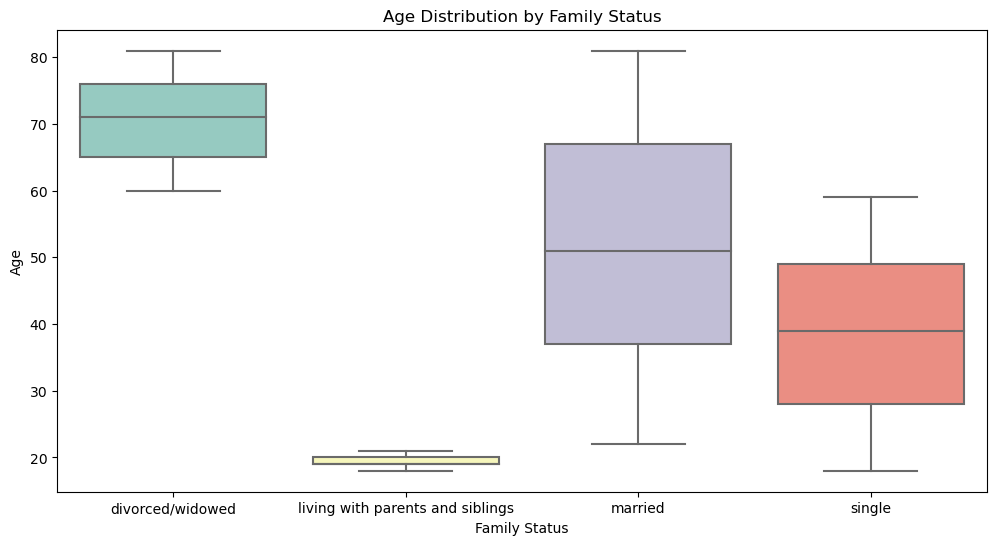

In [11]:
# Plot the distribution of orders by age and family status
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='family_status', y='age', palette='Set3')
plt.title('Age Distribution by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Age')
plt.show()

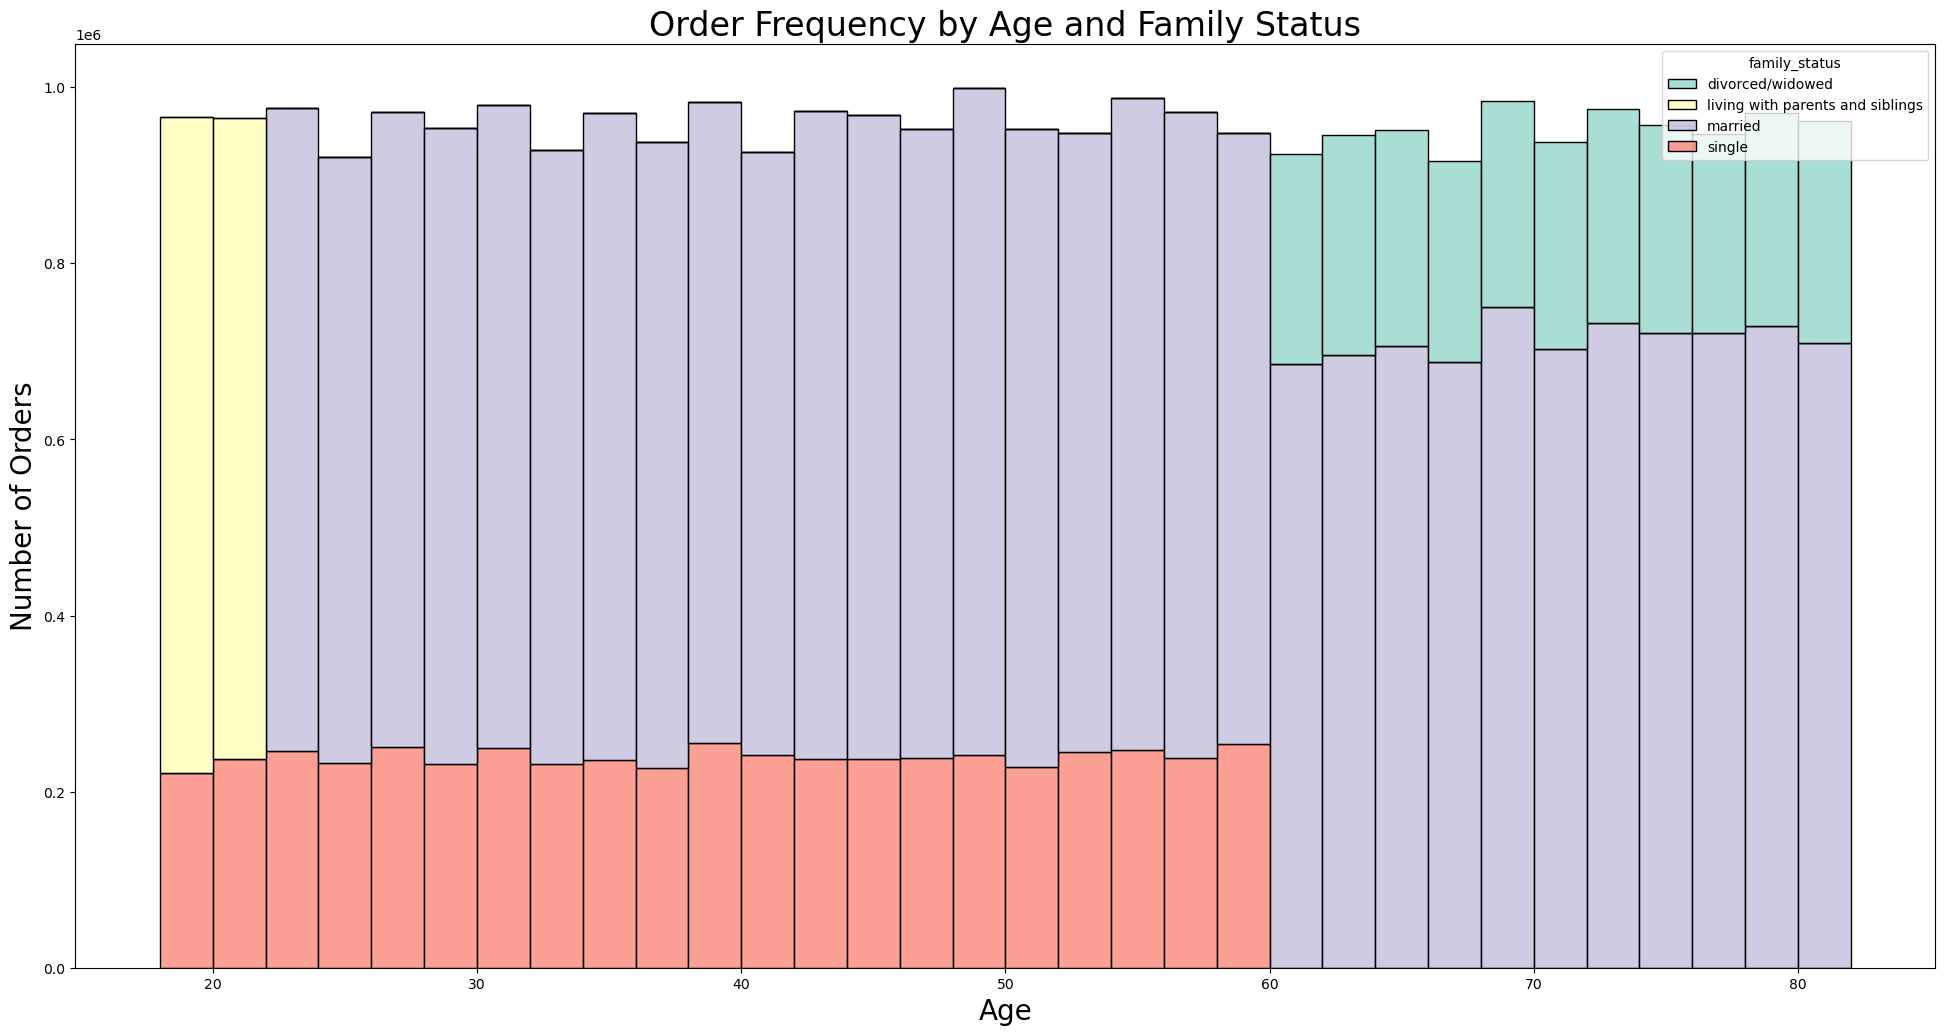

In [12]:
# Analyze the order frequency by age and family status
plt.figure(figsize=(24, 12))
sns.histplot(data=df, x='age', hue='family_status', multiple='stack', palette='Set3', binwidth=2)

plt.title('Order Frequency by Age and Family Status', fontsize=24)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Number of Orders', fontsize=20)
plt.show()

### 5.4 Is there a connection between age and family status in terms of ordering habits?

#### Age Distribution by Family Status
The first plot shows the age distribution across different family statuses. 

- **Divorced/Widowed**: The age range is relatively high, with the median age around 70.
- **Living with Parents and Siblings**: This group is primarily composed of younger individuals around the age of 20.
- **Married**: The age range is quite broad, spanning from early 20s to 80s, with a median age around 50.
- **Single**: The age distribution is more centered around the 30s.



#### Order Frequency by Age and Family Status
The second plot illustrates the order frequency by age and family status.

- **Married** individuals have the highest order frequency across all age groups, especially noticeable in the 30 to 60 age range.
- **Single** individuals maintain a relatively consistent order frequency across different ages, though lower than married individuals.
- **Living with Parents and Siblings** shows a lower order frequency concentrated around the younger age group (around 20).
- **Divorced/Widowed** individuals show a higher order frequency in the older age groups (60 and above).



### Insights
- **Married individuals** are the most active shoppers across a wide age range, indicating strong engagement with Instacart's services.
- **Younger individuals living with parents and siblings** show the least engagement, likely due to different shopping habits or reliance on family members for shopping.
- **Older, divorced/widowed individuals** show high engagement, suggesting a potential focus group for targeted marketing efforts.
- **Single individuals** maintain a steady shopping pattern, which could be indicative of regular, individual shopping needs.

These insights can help the marketing and sales teams tailor their strategies based on the age and family status of their customer base, optimizing engagement and improving customer satisfaction.


# Questio 5.5  What different classifications does the demographic information suggest?

Age? Income? Certain types of goods? Family status?
To address question 5.5, we will analyze the demographic information of the customers to identify different classifications based on age, income, certain types of goods, and family status. Here’s a step-by-step plan to perform this analysis:

Age Distribution: Analyze the distribution of customers across different age groups.
Income Distribution: Analyze the distribution of customers across different income groups.
Goods Categories: Identify which types of goods are more popular among different demographic segments.
Family Status: Analyze the distribution of customers based on family status.

# Step 1: Age Distribution

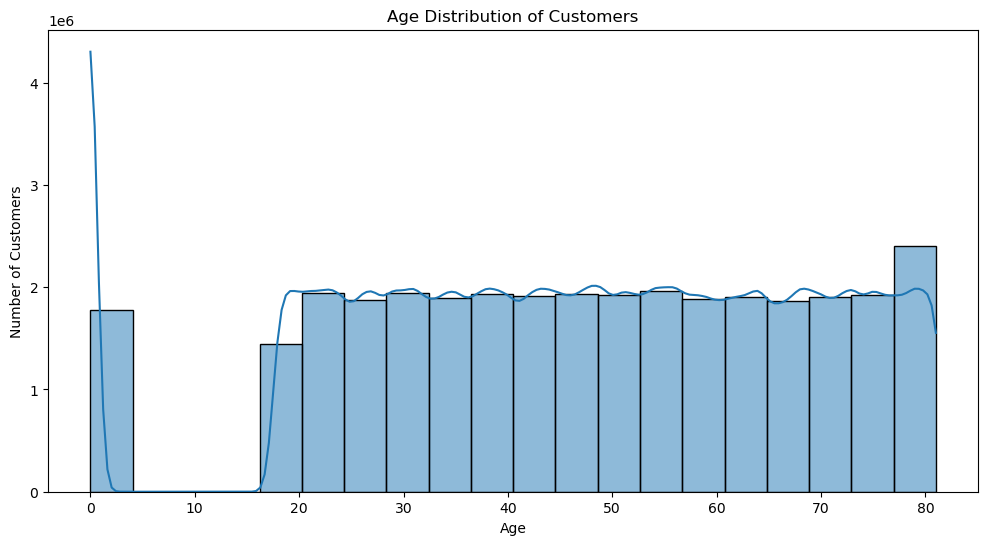

In [13]:
# Plot the age distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

# Step 2: Income Distribution

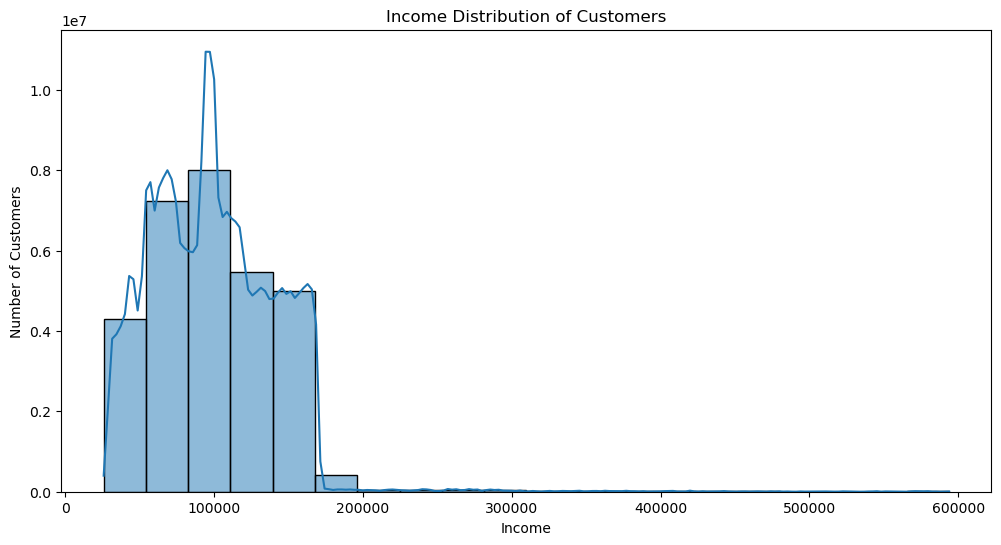

In [14]:
# Plot the income distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['income'], bins=20, kde=True)
plt.title('Income Distribution of Customers')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.show()

# Step 3: Goods Categories Analysis

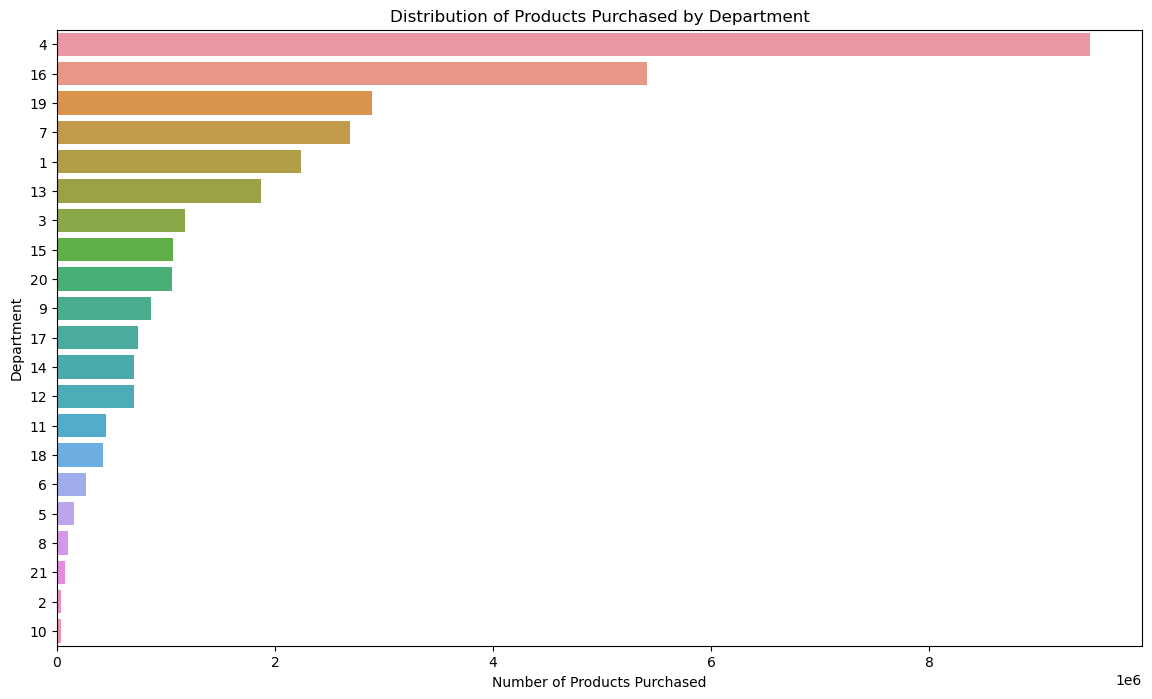

In [15]:
# Plot the distribution of product categories purchased by customers
plt.figure(figsize=(14, 8))
sns.countplot(y='department_id', data=df, order=df['department_id'].value_counts().index)
plt.title('Distribution of Products Purchased by Department')
plt.xlabel('Number of Products Purchased')
plt.ylabel('Department')
plt.show()


# Step 4: Family Status Analysis

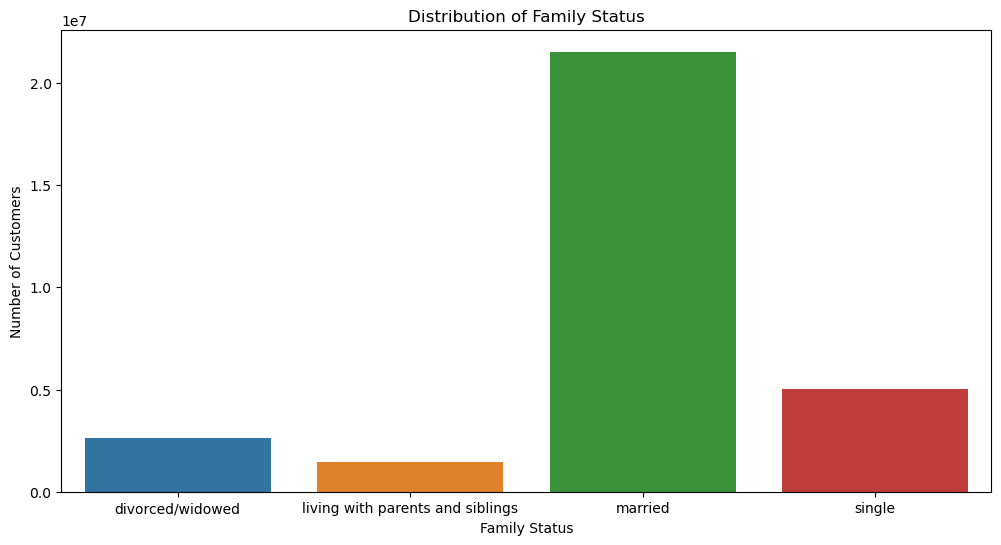

In [16]:
# Plot the distribution of family status
plt.figure(figsize=(12, 6))
sns.countplot(x='family_status', data=df)
plt.title('Distribution of Family Status')
plt.xlabel('Family Status')
plt.ylabel('Number of Customers')
plt.show()


# Step 4: Family Status Analysis

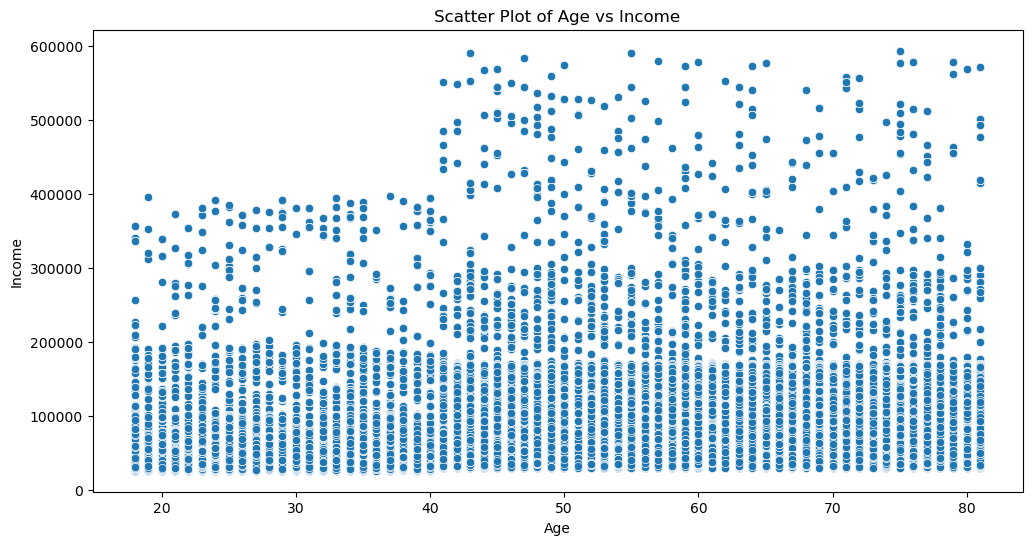

In [17]:
# Scatter plot of Age vs Income
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='income', data=df)
plt.title('Scatter Plot of Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


# Combine Age and Income Analysis

In [18]:
# Group by family_status to analyze order frequency and average order size
order_analysis_by_family_status = df.groupby('family_status').agg({
    'order_id': 'count',
    'prices': 'mean'
}).reset_index()


In [19]:
# Rename columns for clarity
order_analysis_by_family_status.columns = ['Family Status', 'Order Frequency', 'Average Order Size']

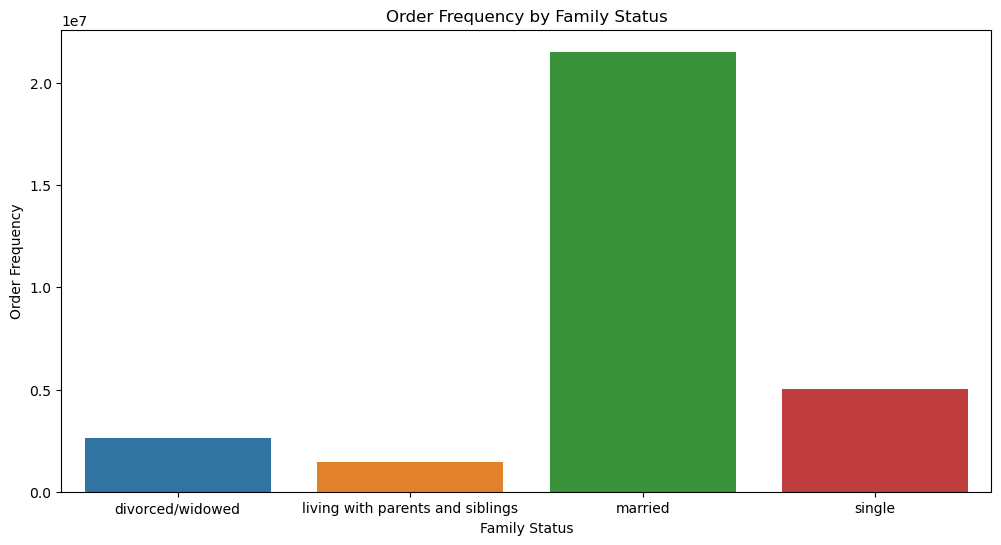

In [20]:
# Plot the order frequency by family status
plt.figure(figsize=(12, 6))
sns.barplot(x='Family Status', y='Order Frequency', data=order_analysis_by_family_status)
plt.title('Order Frequency by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Order Frequency')
plt.show()

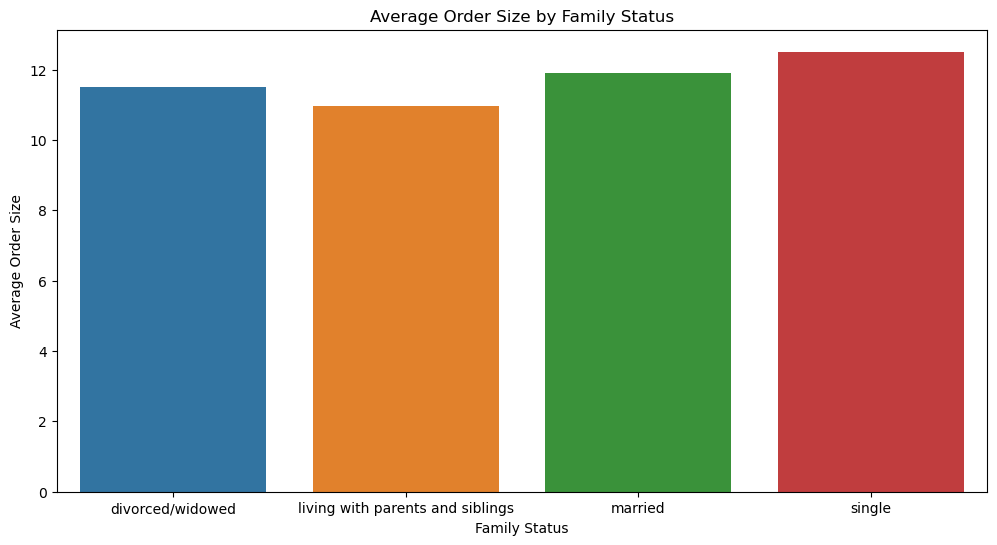

In [21]:
# Plot the average order size by family status
plt.figure(figsize=(12, 6))
sns.barplot(x='Family Status', y='Average Order Size', data=order_analysis_by_family_status)
plt.title('Average Order Size by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Average Order Size')
plt.show()

### Analysis of Customer Demographics and Ordering Habits

#### Age Distribution of Customers
The first plot shows the age distribution of customers. The majority of customers fall into the middle-aged range, with a noticeable spike in the younger age group, particularly those aged below 10. 



#### Average Order Size by Family Status
The second plot illustrates the average order size by family status. Single customers tend to have the highest average order size, followed closely by married customers. Those living with parents and siblings and divorced/widowed customers have slightly lower average order sizes.



#### Distribution of Family Status
The third plot shows the distribution of family status among customers. Married customers constitute the largest group, followed by single customers. Divorced/widowed customers and those living with parents and siblings make up smaller proportions of the customer base.



#### Distribution of Products Purchased by Department
The fourth plot highlights the distribution of products purchased by department. Department 4 has the highest number of products purchased, followed by departments 16 and 19. Departments 7 and 1 also see a significant number of purchases.



#### Income Distribution of Customers
The fifth plot shows the income distribution of customers. Most customers have an income between $50,000 and $150,000, with a peak around $75,000. There are fewer customers with very high incomes above $200,000.

5.5 Income Distribution of Customers.png)

#### Order Frequency by Family Status
The sixth plot illustrates the order frequency by family status. Married customers have the highest order frequency, indicating they are more frequent shoppers compared to other family statuses.



#### Scatter Plot of Age vs Income
The final plot shows a scatter plot of age versus income. There is no strong correlation between age and income, but it is evident that customers of all ages are present in various income brackets.



### Summary
- **Age Distribution**: Predominantly middle-aged customers, with a significant number of very young customers.
- **Average Order Size by Family Status**: Single and married customers tend to spend more per order.
- **Family Status Distribution**: Most customers are married.
- **Product Purchase Distribution**: Certain departments, particularly department 4, see the highest number of purchases.
- **Income Distribution**: Most customers have a moderate income.
- **Order Frequency by Family Status**: Married customers are the most frequent shoppers.
- **Age vs Income**: Wide distribution of incomes across all age groups.

These insights can help in tailoring marketing strategies and improving customer targeting based on demographic and behavioral patterns.


### 5.6 Analysis of Ordering Habits by Customer Profiles

Let's create visualizations and analyze the ordering habits based on different customer profiles. We'll consider factors such as the price of orders, the frequency of orders, the types of products customers are ordering, and other relevant factors.

#### 5.6.1 Average Order Price by Family Status and Income

Let's create a plot to compare the average order price based on family status and income levels.

#### 5.6.2 Order Frequency by Age and Family Status

We'll also analyze how order frequency varies with age and family status.

#### 5.6.3 Popular Products by Family Status

Next, we'll look into the most popular products among different family statuses.

#### 5.6.4 Customer Profile Segmentation

Finally, we'll perform customer segmentation based on various demographic factors.


In [2]:
# Create income bins for hue in 5.6.1
income_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, 600000]
income_labels = ['0-25k', '25-50k', '50-75k', '75-100k', '100-150k', '150-200k', '200k+']
df['income_bins'] = pd.cut(df['income'], bins=income_bins, labels=income_labels)



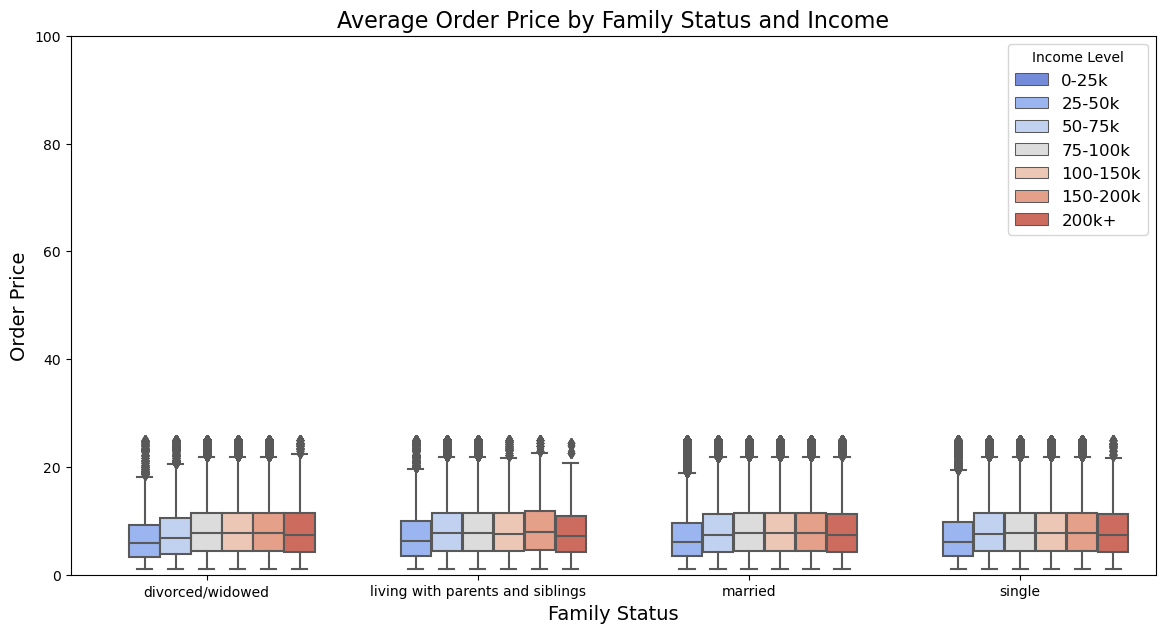

In [7]:
# 5.6.1 Average Order Price by Family Status and Income
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='family_status', y='prices', hue='income_bins', palette='coolwarm')
plt.title('Average Order Price by Family Status and Income', fontsize=16)
plt.xlabel('Family Status', fontsize=14)
plt.ylabel('Order Price', fontsize=14)
plt.legend(title='Income Level', loc='upper right', fontsize=12)
plt.ylim(0, 100)  # Adjust the y-axis limit to focus on the main range of order prices
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


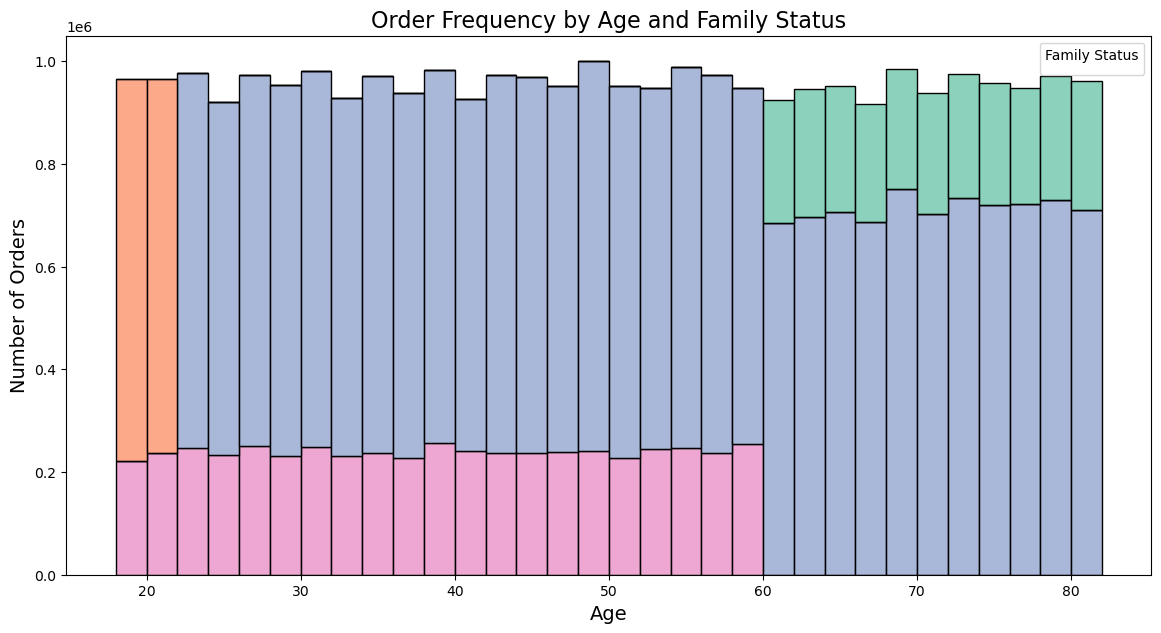

In [4]:

# 5.6.2 Order Frequency by Age and Family Status
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='age', hue='family_status', multiple='stack', palette='Set2', binwidth=2)
plt.title('Order Frequency by Age and Family Status', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.legend(title='Family Status', loc='upper right')
plt.show()

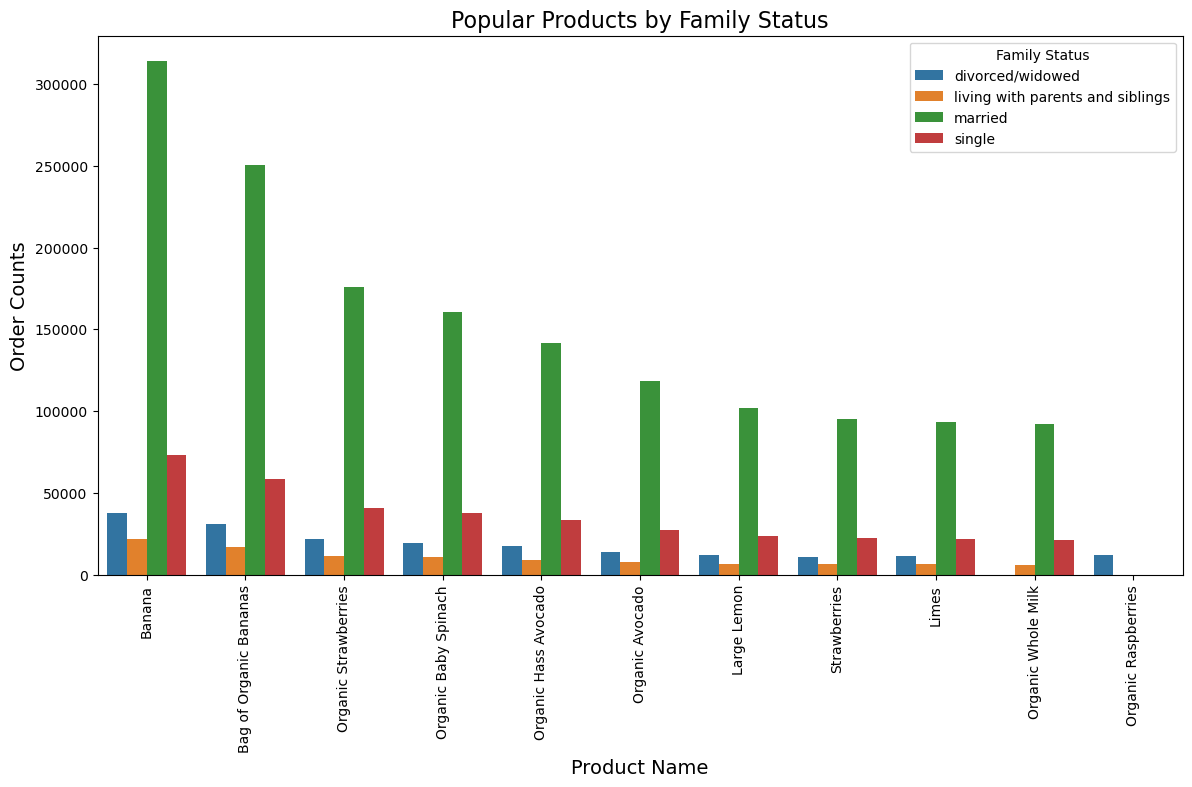

In [5]:
# 5.6.3 Popular Products by Family Status
plt.figure(figsize=(14, 7))
popular_products = df.groupby(['product_name', 'family_status']).size().reset_index(name='counts')
popular_products = popular_products.sort_values('counts', ascending=False).groupby('family_status').head(10)  # Top 10 products per family status
sns.barplot(data=popular_products, x='product_name', y='counts', hue='family_status', dodge=True)
plt.title('Popular Products by Family Status', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Order Counts', fontsize=14)
plt.legend(title='Family Status', loc='upper right')
plt.xticks(rotation=90)
plt.show()



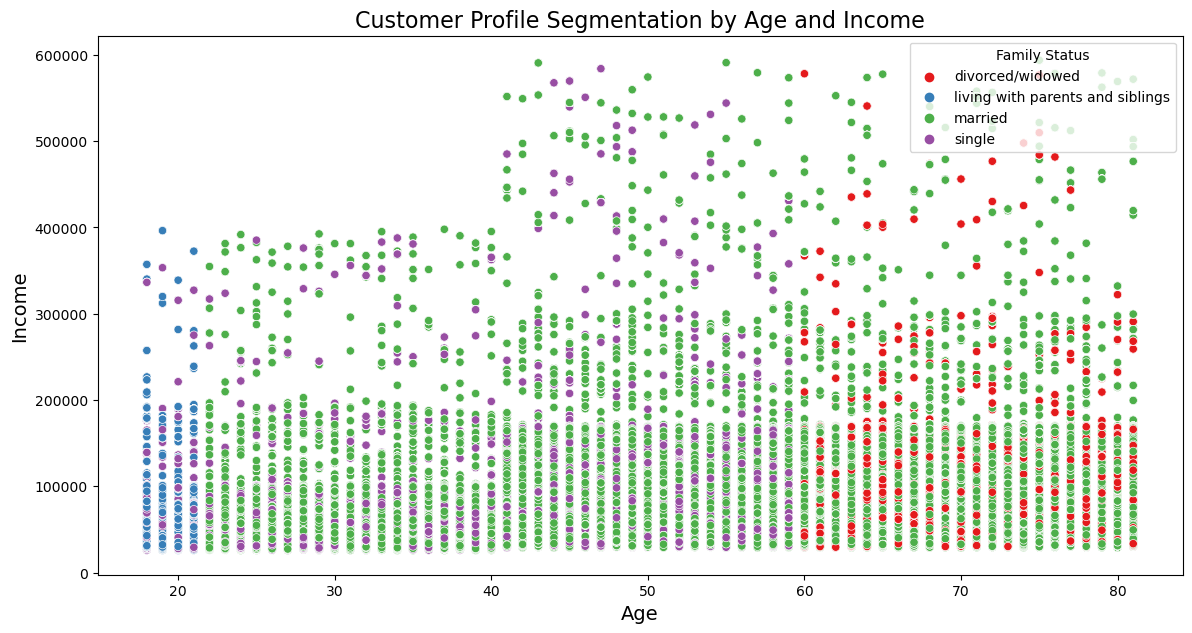

In [6]:
# 5.6.4 Customer Profile Segmentation
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='age', y='income', hue='family_status', palette='Set1')
plt.title('Customer Profile Segmentation by Age and Income', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.legend(title='Family Status', loc='upper right')
plt.show()

### 5.6 Analysis of Ordering Habits by Customer Profiles
Let's create visualizations and analyze the ordering habits based on different customer profiles. We'll consider factors such as the price of orders, the frequency of orders, the types of products customers are ordering, and other relevant factors.

#### 5.6.1 Average Order Price by Family Status and Income
Let's create a plot to compare the average order price based on family status and income levels.




#### 5.6.3 Popular Products by Family Status
Next, we'll look into the most popular products among different family statuses.



- The bar plot highlights the most popular products ordered by customers of different family statuses.
- Bananas, organic strawberries, and organic avocados are among the most popular products across all family statuses.
- Married customers consistently show higher order counts for popular products compared to other family statuses.

#### 5.6.4 Customer Profile Segmentation
Finally, we'll perform customer segmentation based on various demographic factors.



- The scatter plot shows the segmentation of customer profiles based on age and income.
- Most customers have incomes ranging between $25k to $100k.
- Married customers (green) and single customers (purple) form the largest clusters in terms of both age and income diversity.

These visualizations provide insights into how different demographic factors influence customer ordering habits, helping marketing and sales teams tailor their strategies accordingly.
